# Overview
The script reads an mtx file called sample_4.mtx in the sample_dataset folder.  
It then displays it in a cytoscape graph.  
Requires the ipysytoscape library and Python 3  
Tested on jupyter notebook with version pandas version 1.3.4

In [1]:
!pip install ipycytoscape

In [2]:
!pip install pandas

In [3]:
# Import all important libraries
from scipy.io import mmread
from scipy.io import mminfo
import pandas as pd
import numpy as np
import requests
# For reading the file
import os
import sys

# For transforming into cytoscape
import ipycytoscape
import json
import ipywidgets

# Double checking versions
print(pd.__version__) #had 1.3.4
print(ipycytoscape.__version__) #had 1.3.2
print(json.__version__) #had 2.0.9
print(ipywidgets.__version__) #had 7.6.5

2.2.2
1.3.3
2.0.9
8.1.3


In [4]:
# Set path and open file for reading
# filespec = os.fspath('../sample_dataset/sample_4.mtx')
# stream = open(filespec, 'r')

In [5]:
# #line = stream.readline()
# # Skip lines that start with %
# while line and line[0] in ['%', 37]:
#     line = stream.readline()
# # Skip empty lines
# while not line.strip():
#     line = stream.readline()

In [6]:
import requests
import pandas as pd
import json

# Define the API URL
URL = 'https://api.opendata.ocs.oraclecloud.com/data/landsat-4-5-tm/'


In [7]:
def fetch_json_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

data = fetch_json_data(URL)


In [8]:
def print_json_data(data):
    print("JSON Data:", json.dumps(data, indent=2))

if data:
    print_json_data(data)


JSON Data: {
  "objects": [],
  "prefixes": [
    "001/"
  ],
  "nextStartWith": "001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF"
}


In [9]:
def extract_relevant_parts(data):
    objects = data.get('objects', [])
    prefixes = data.get('prefixes', [])
    next_start_with = data.get('nextStartWith', '')
    return objects, prefixes, next_start_with

objects, prefixes, next_start_with = extract_relevant_parts(data)

def print_extracted_parts(objects, prefixes, next_start_with):
    print("Objects:", objects)
    print("Prefixes:", prefixes)
    print("Next Start With:", next_start_with)

print_extracted_parts(objects, prefixes, next_start_with)


Objects: []
Prefixes: ['001/']
Next Start With: 001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF


In [10]:
def initialize_data_structures():
    return [], [], 1  # edge_array, node_array, counter

edge_array, node_array, counter = initialize_data_structures()


In [11]:
def process_line(line, edge_array, node_array, counter):
    if line and line[0] not in ['%', '37']:
        split_line = line.split('/')
        print("Split line:", split_line)
        
        numeric_parts = [part for part in split_line if part.isdigit()]
        if len(numeric_parts) >= 2:
            try:
                rows, cols = map(int, numeric_parts[:2])
                entries = 1  # Default entries to 1 if not specified
                
                print("rows: ", rows, " cols: ", cols, " entries: ", entries)
                
                node_source = {'id': rows, 'label': rows, 'classes': rows}
                node_target = {'id': cols, 'label': cols, 'classes': cols}
                if node_source not in node_array:
                    node_array.append(node_source)
                if node_target not in node_array:
                    node_array.append(node_target)
                
                edge_entry = {'id': 'line ' + str(counter), 'source': rows, 'target': cols, 'weight': entries}
                edge_array.append(edge_entry)
                
                counter += 1
            except ValueError:
                print(f"Skipping invalid line due to ValueError: {line}")
        else:
            print(f"Skipping invalid line: {line}")
    return edge_array, node_array, counter

edge_array, node_array, counter = process_line(next_start_with, edge_array, node_array, counter)


Split line: ['001', '058', 'LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF']
rows:  1  cols:  58  entries:  1


In [12]:
def convert_to_dataframe(edge_array, node_array):
    node_df = pd.DataFrame(node_array)
    edge_df = pd.DataFrame(edge_array, columns=['id', 'source', 'target', 'weight'])
    return node_df, edge_df

node_df, edge_df = convert_to_dataframe(edge_array, node_array)

def print_dataframes(node_df, edge_df):
    print("Node DataFrame Columns:", node_df.columns)
    print("Node DataFrame:")
    print(node_df)
    print("\nEdge DataFrame:")
    print(edge_df)

print_dataframes(node_df, edge_df)


Node DataFrame Columns: Index(['id', 'label', 'classes'], dtype='object')
Node DataFrame:
   id  label  classes
0   1      1        1
1  58     58       58

Edge DataFrame:
       id  source  target  weight
0  line 1       1      58       1


In [13]:
def assign_node_colors(node_df):
    if not node_df.empty:
        node_df['background-color'] = 'red'
        node_df.loc[node_df['id'] <= 40, 'background-color'] = 'blue'
        node_df.loc[node_df['id'] >= 100, 'background-color'] = 'orange'
    return node_df

node_df = assign_node_colors(node_df)


In [14]:
def main():
    data = fetch_json_data(URL)
    if data:
        print_json_data(data)
        objects, prefixes, next_start_with = extract_relevant_parts(data)
        print_extracted_parts(objects, prefixes, next_start_with)
        edge_array, node_array, counter = initialize_data_structures()
        edge_array, node_array, counter = process_line(next_start_with, edge_array, node_array, counter)
        node_df, edge_df = convert_to_dataframe(edge_array, node_array)
        node_df = assign_node_colors(node_df)
        print_dataframes(node_df, edge_df)

main()


JSON Data: {
  "objects": [],
  "prefixes": [
    "001/"
  ],
  "nextStartWith": "001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF"
}
Objects: []
Prefixes: ['001/']
Next Start With: 001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF
Split line: ['001', '058', 'LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF']
rows:  1  cols:  58  entries:  1
Node DataFrame Columns: Index(['id', 'label', 'classes', 'background-color'], dtype='object')
Node DataFrame:
   id  label  classes background-color
0   1      1        1             blue
1  58     58       58              red

Edge DataFrame:
       id  source  target  weight
0  line 1       1      58       1


In [15]:
def convert_to_dict_records(nodes_df, edges_df):
    nodes_dict = nodes_df.to_dict('records')
    edges_dict = edges_df.to_dict('records')
    return nodes_dict, edges_dict


In [16]:
def build_nodes_graph_list(nodes_dict):
    data_keys = ['id', 'label', 'classes']
    position_keys = ['position_x', 'position_y']
    rest_keys = ['score', 'idInt', 'name', 'group', 'removed', 'selected', 'selectable', 'locked', 'grabbed', 'grabbable']

    nodes_graph_list = []
    for node in nodes_dict:
        data_sub_dict = {'data': {el: node[el] for el in data_keys}}
        rest_sub_dict = {el: node[el] for el in node.keys() if el in rest_keys}
        posi_sub_dict = {}
        if 'position_x' in node.keys() and 'position_y' in node.keys():
            posi_sub_dict = {'position': {el: node[el] for el in position_keys}}

        dict_node = {**data_sub_dict, **rest_sub_dict, **posi_sub_dict}
        nodes_graph_list.append(dict_node)

    return nodes_graph_list


In [17]:
def build_edges_graph_list(edges_dict):
    data_keys = ['id', 'source', 'target']
    data_keys2 = ['label', 'classes']
    rest_keys = ['score', 'weight', 'group', 'networkId', 'networkGroupId', 'intn', 'rIntnId', 'removed', 'selected', 'selectable', 'locked', 'grabbed', 'grabbable']

    edges_graph_list = []
    for edge in edges_dict:
        data_sub_dict = {el: edge[el] for el in data_keys}
        data_sub_dict2 = {el: edge[el] for el in edge.keys() if el in data_keys2}
        rest_sub_dict = {el: edge[el] for el in edge.keys() if el in rest_keys}

        dict_edge = {'data': {**data_sub_dict, **data_sub_dict2}, **rest_sub_dict}
        edges_graph_list.append(dict_edge)

    return edges_graph_list


In [18]:
def build_style_elements_list(nodes_dict, edges_dict):
    all_node_style = ['background-color', 'background-opacity', 'font-family', 'font-size', 'label', 'width', 'shape', 'height', 'text-valign', 'text-halign']
    all_edge_style = ['background-color', 'background-opacity', 'font-family', 'font-size', 'label', 'width', 'line-color']

    style_elements = []
    for node in nodes_dict:
        node_dict = {'selector': f'node[id = "{node["id"]}"]'}
        style_dict = {"style": {el: node[el] for el in node.keys() if el in all_node_style}}
        node_dict.update(style_dict)
        style_elements.append(node_dict)

    for edge in edges_dict:
        edge_dict = {'selector': f'edge[id = "{edge["id"]}"]'}
        style_dict = {"style": {el: edge[el] for el in edge.keys() if el in all_edge_style}}
        edge_dict.update(style_dict)
        style_elements.append(edge_dict)

    return style_elements


In [19]:
import ipycytoscape

def transform_into_ipycytoscape(nodes_df, edges_df):
    nodes_dict, edges_dict = convert_to_dict_records(nodes_df, edges_df)
    
    nodes_graph_list = build_nodes_graph_list(nodes_dict)
    edges_graph_list = build_edges_graph_list(edges_dict)
    
    total_graph_dict = {'nodes': nodes_graph_list, 'edges': edges_graph_list}

    style_elements = build_style_elements_list(nodes_dict, edges_dict)

    data_graph = json.dumps(total_graph_dict)
    json_to_python = json.loads(data_graph)
    
    result_cyto = ipycytoscape.CytoscapeWidget()
    result_cyto.graph.add_graph_from_json(json_to_python)
    result_cyto.set_style(style_elements)
    
    return result_cyto


In [20]:
G = transform_into_ipycytoscape(node_df, edge_df)
display(G)


CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node[id = "1"]', 'style': {'…

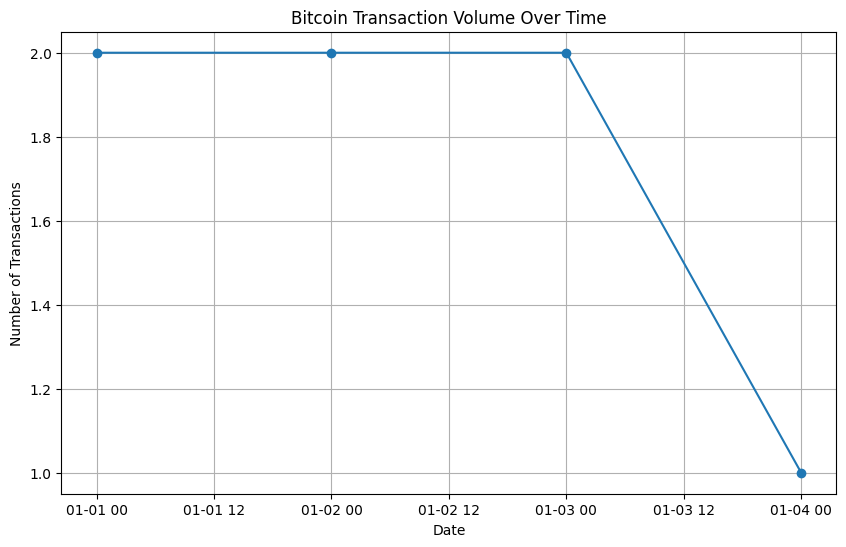

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# Aggregate the number of transactions per day
transaction_volume = df.groupby(df['date'].dt.date).size().reset_index(name='transaction_count')

# Plot the transaction volume over time
plt.figure(figsize=(10, 6))
plt.plot(transaction_volume['date'], transaction_volume['transaction_count'], marker='o')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


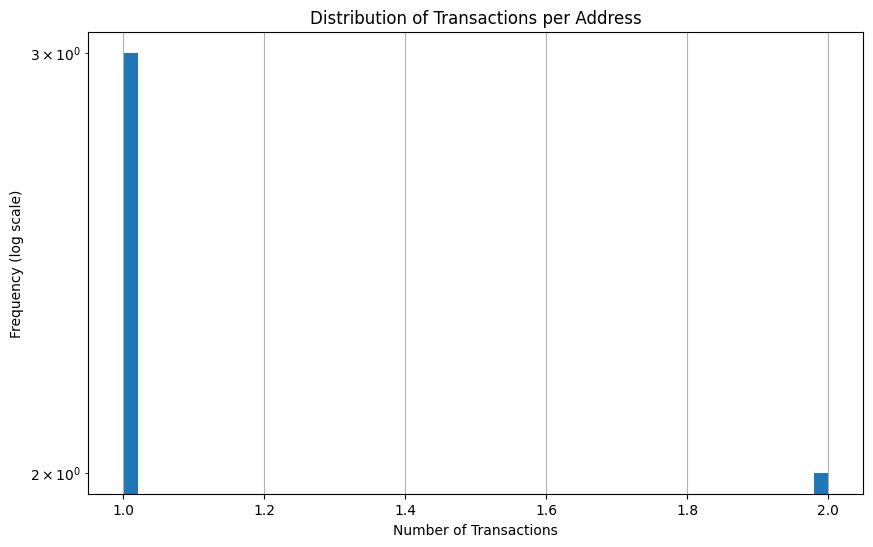

In [22]:
# Count the number of transactions per address
address_activity = df['address_id'].value_counts().reset_index(name='transaction_count')
address_activity.columns = ['address_id', 'transaction_count']

# Plot the distribution of transaction counts per address
plt.figure(figsize=(10, 6))
plt.hist(address_activity['transaction_count'], bins=50, log=True)
plt.title('Distribution of Transactions per Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()


Degree Centrality: {1: 0.09090909090909091, 100: 0.18181818181818182, 2: 0.09090909090909091, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.09090909090909091, 5: 0.09090909090909091, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}
Betweenness Centrality: {1: 0.0, 100: 0.01818181818181818, 2: 0.0, 101: 0.01818181818181818, 3: 0.0, 102: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 103: 0.0, 7: 0.0, 104: 0.0}
Closeness Centrality: {1: 0.12121212121212122, 100: 0.18181818181818182, 2: 0.12121212121212122, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.12121212121212122, 5: 0.12121212121212122, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}


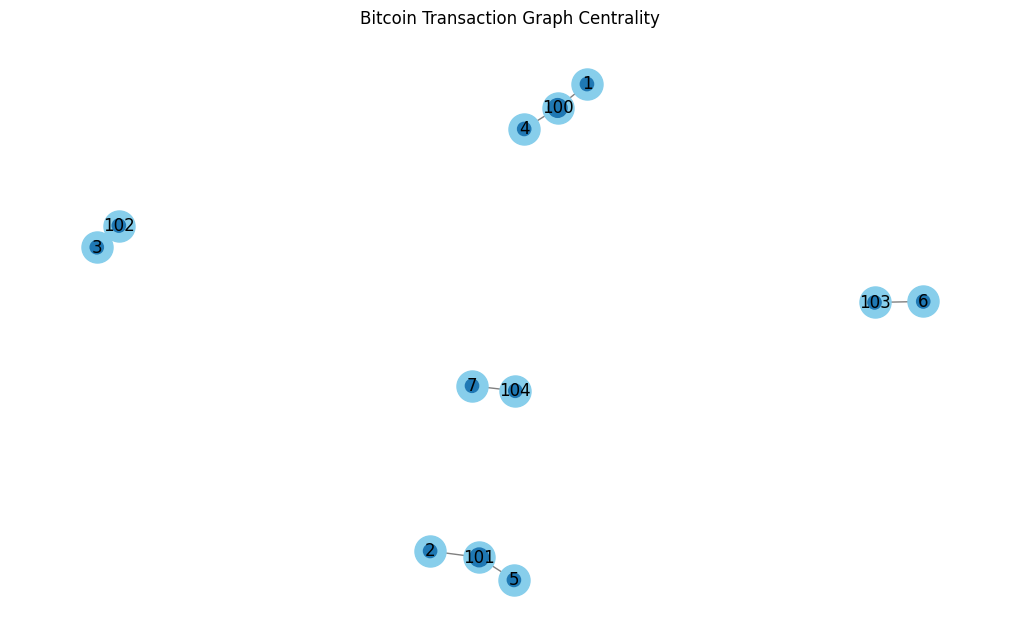

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample bipartite graph
G = nx.Graph()
edges = [(1, 100), (2, 101), (3, 102), (4, 100), (5, 101), (6, 103), (7, 104)]
G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Print centrality measures
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

# Visualize the graph with centrality measures
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=degree_centrality.keys(), node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Bitcoin Transaction Graph Centrality')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


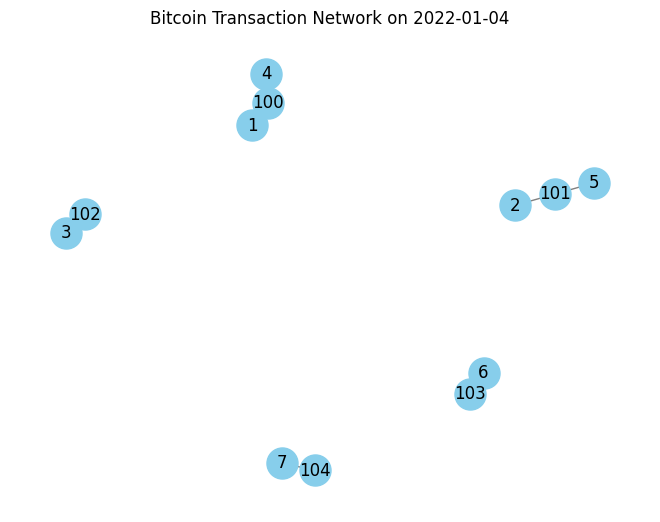

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# Create a sample bipartite graph with timestamps
G = nx.Graph()
edges = [
    (1, 100, '2022-01-01'), (2, 101, '2022-01-02'), (3, 102, '2022-01-03'),
    (4, 100, '2022-01-01'), (5, 101, '2022-01-02'), (6, 103, '2022-01-03'),
    (7, 104, '2022-01-04')
]

for u, v, date in edges:
    G.add_edge(u, v, date=date)

# Create a function to update the graph for animation
def update(num):
    plt.clf()
    sub_edges = [(u, v) for u, v, d in edges if d <= dates[num]]
    sub_G = G.edge_subgraph(sub_edges)
    pos = nx.spring_layout(sub_G)
    nx.draw(sub_G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(f'Bitcoin Transaction Network on {dates[num]}')

# Create the animation
dates = sorted(set(d for u, v, d in edges))
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=len(dates), interval=1000, repeat=False)
plt.close()  # Close the static figure

from IPython.display import HTML
HTML(ani.to_jshtml())


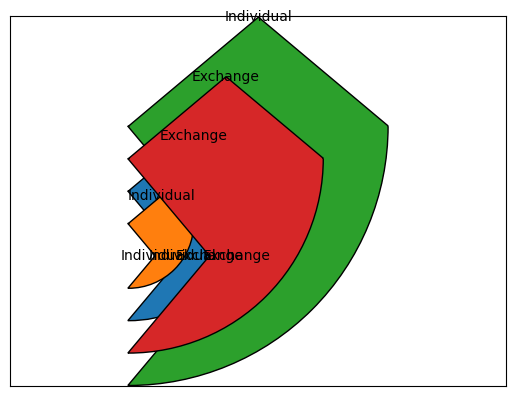

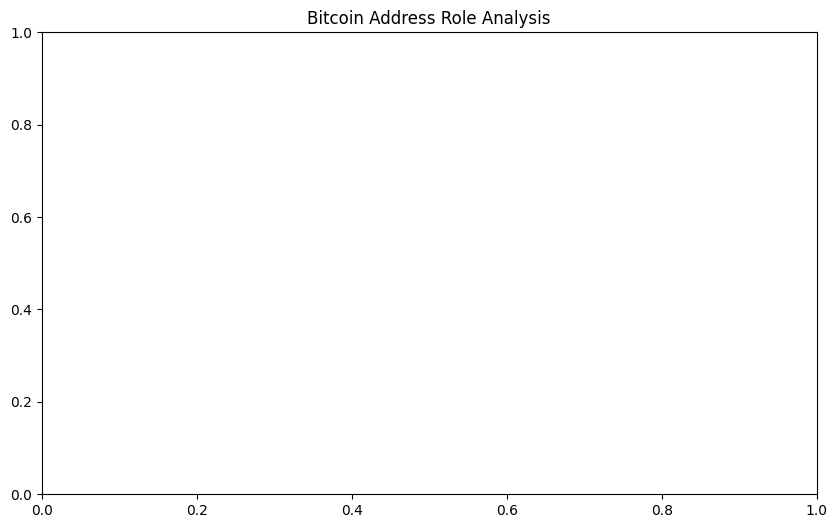

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Sample data
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}

df = pd.DataFrame(data)

# Create a Sankey diagram
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
fig = plt.figure(figsize=(10, 6))
sankey.finish()

plt.title('Bitcoin Address Role Analysis')
plt.show()


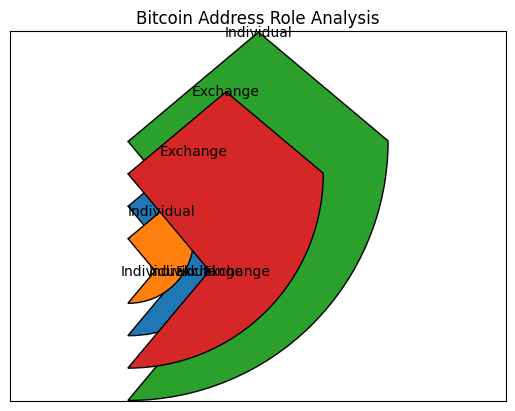

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Sample data
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}

df = pd.DataFrame(data)

# Create a Sankey diagram
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
sankey.finish()

plt.title('Bitcoin Address Role Analysis')
plt.show()


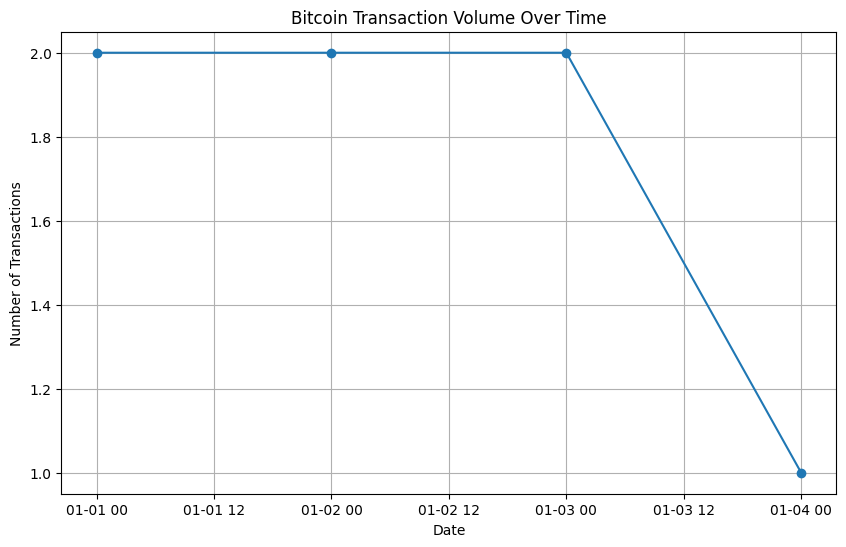

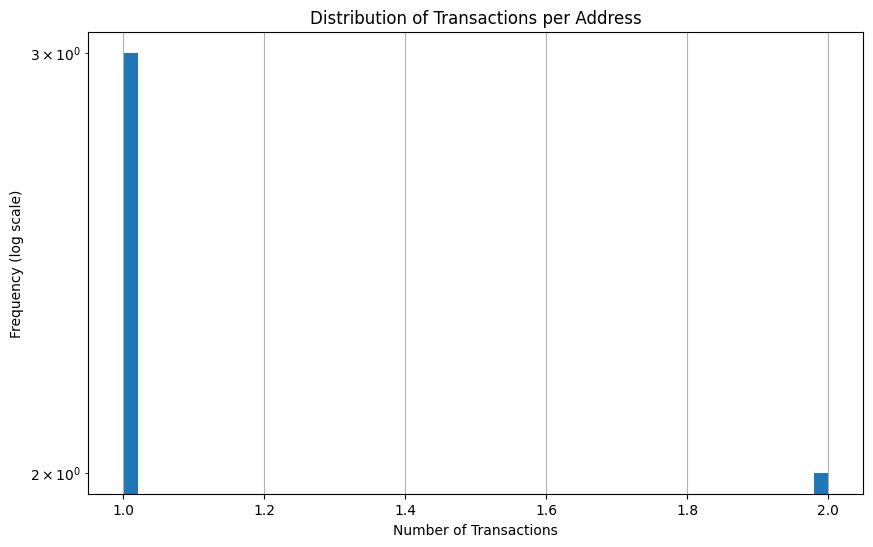

Degree Centrality: {1: 0.09090909090909091, 100: 0.18181818181818182, 2: 0.09090909090909091, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.09090909090909091, 5: 0.09090909090909091, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}
Betweenness Centrality: {1: 0.0, 100: 0.01818181818181818, 2: 0.0, 101: 0.01818181818181818, 3: 0.0, 102: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 103: 0.0, 7: 0.0, 104: 0.0}
Closeness Centrality: {1: 0.12121212121212122, 100: 0.18181818181818182, 2: 0.12121212121212122, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.12121212121212122, 5: 0.12121212121212122, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}


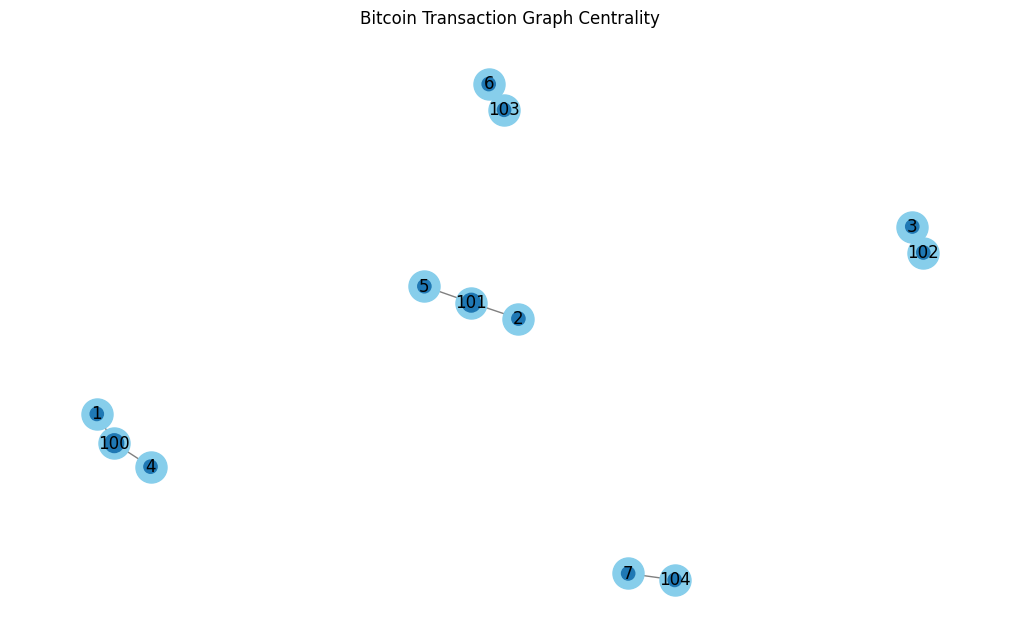

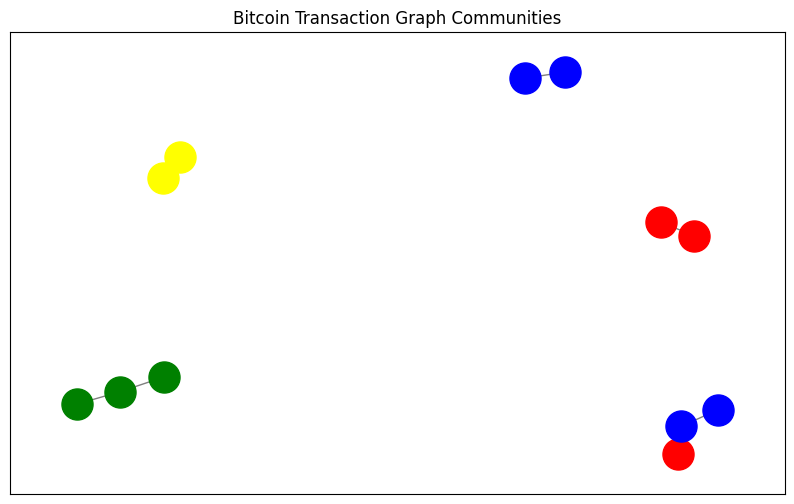

<Figure size 1000x600 with 0 Axes>

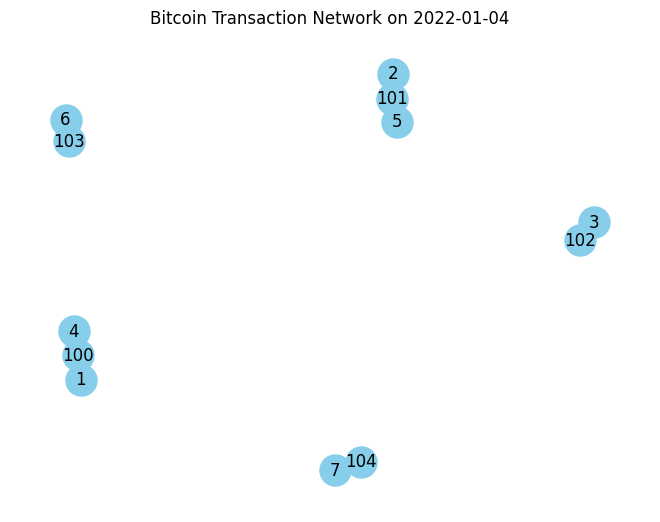

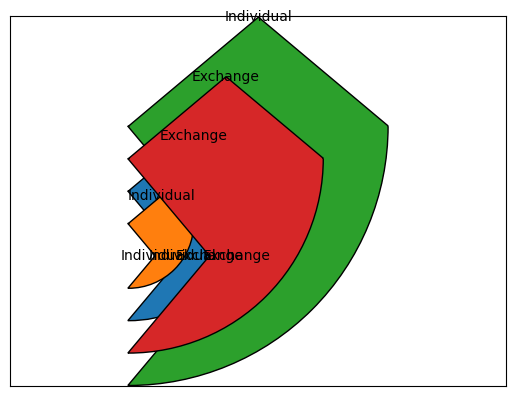

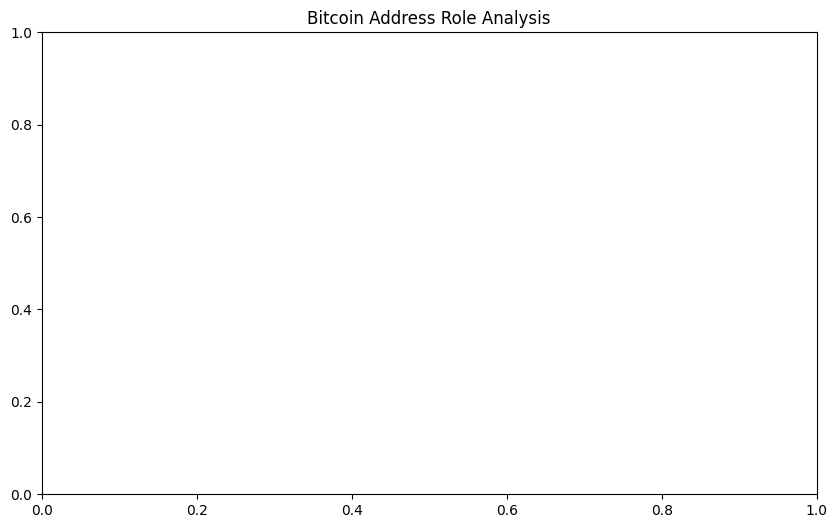

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import itertools
from matplotlib.animation import FuncAnimation
from matplotlib.sankey import Sankey
from IPython.display import HTML

# Sample data for transaction volume and address activity
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# 1. Transaction Volume Over Time
transaction_volume = df.groupby(df['date'].dt.date).size().reset_index(name='transaction_count')
plt.figure(figsize=(10, 6))
plt.plot(transaction_volume['date'], transaction_volume['transaction_count'], marker='o')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# 2. Address Activity Distribution
address_activity = df['address_id'].value_counts().reset_index(name='transaction_count')
address_activity.columns = ['address_id', 'transaction_count']
plt.figure(figsize=(10, 6))
plt.hist(address_activity['transaction_count'], bins=50, log=True)
plt.title('Distribution of Transactions per Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

# 3. Transaction Graph Centrality
G = nx.Graph()
edges = [(1, 100), (2, 101), (3, 102), (4, 100), (5, 101), (6, 103), (7, 104)]
G.add_edges_from(edges)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=degree_centrality.keys(), node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Bitcoin Transaction Graph Centrality')
plt.show()

# 4. Cluster Analysis
comp = community.girvan_newman(G)
communities = next(comp)  # Get the first partitioning step
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
colors = ['red', 'blue', 'green', 'yellow']
for i, community in enumerate(sorted(communities)):
    nx.draw_networkx_nodes(G, pos, community, node_size=500, node_color=colors[i % len(colors)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Bitcoin Transaction Graph Communities')
plt.show()

# 5. Temporal Network Analysis
G = nx.Graph()
edges = [
    (1, 100, '2022-01-01'), (2, 101, '2022-01-02'), (3, 102, '2022-01-03'),
    (4, 100, '2022-01-01'), (5, 101, '2022-01-02'), (6, 103, '2022-01-03'),
    (7, 104, '2022-01-04')
]
for u, v, date in edges:
    G.add_edge(u, v, date=date)
def update(num):
    plt.clf()
    sub_edges = [(u, v) for u, v, d in edges if d <= dates[num]]
    sub_G = G.edge_subgraph(sub_edges)
    pos = nx.spring_layout(sub_G)
    nx.draw(sub_G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(f'Bitcoin Transaction Network on {dates[num]}')
dates = sorted(set(d for u, v, d in edges))
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=len(dates), interval=1000, repeat=False)
plt.show()
HTML(ani.to_jshtml())

# 6. Address Role Analysis
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}
df = pd.DataFrame(data)
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
fig = plt.figure(figsize=(10, 6))
sankey.finish()
plt.title('Bitcoin Address Role Analysis')
plt.show()


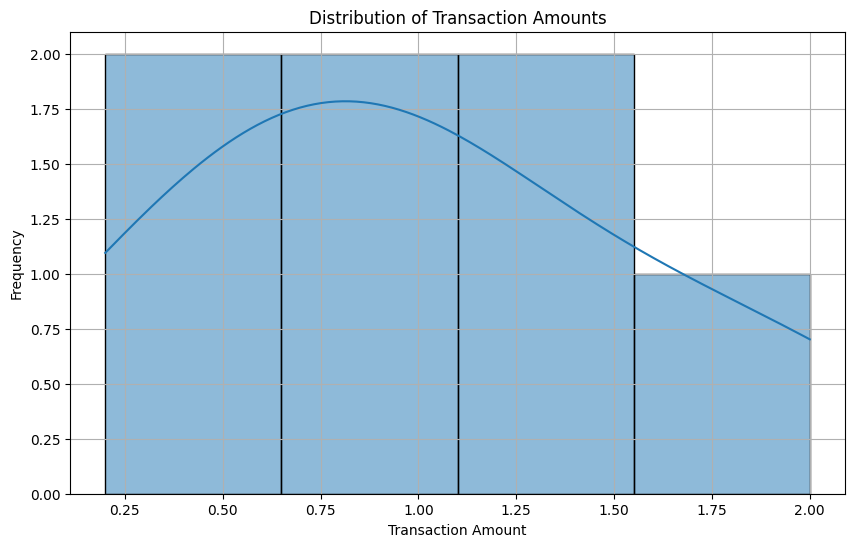

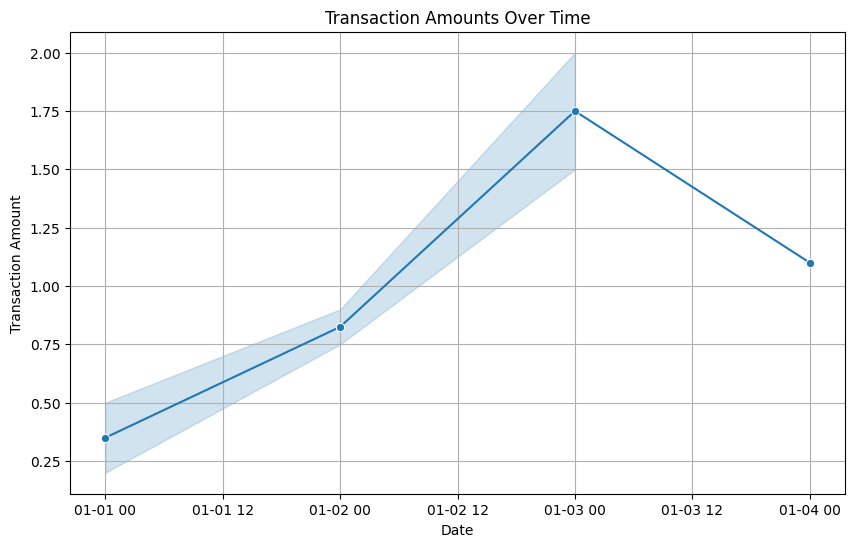

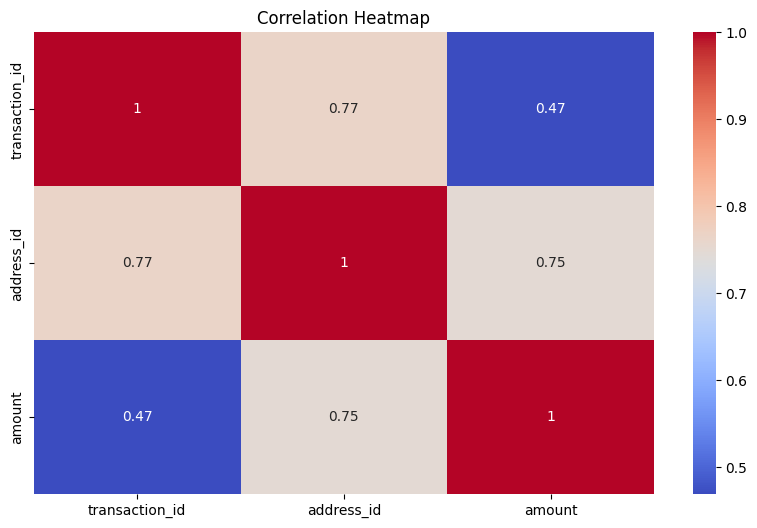

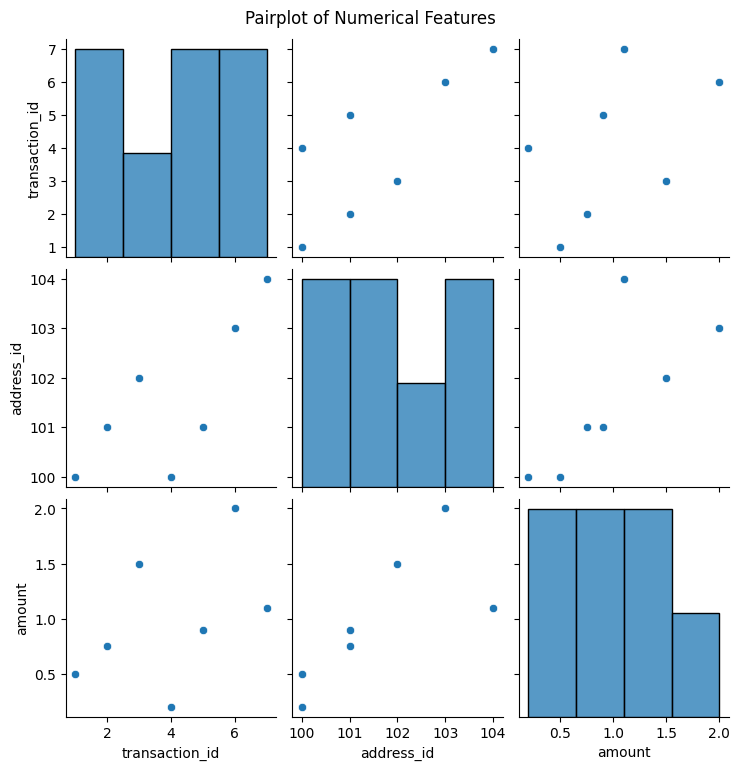

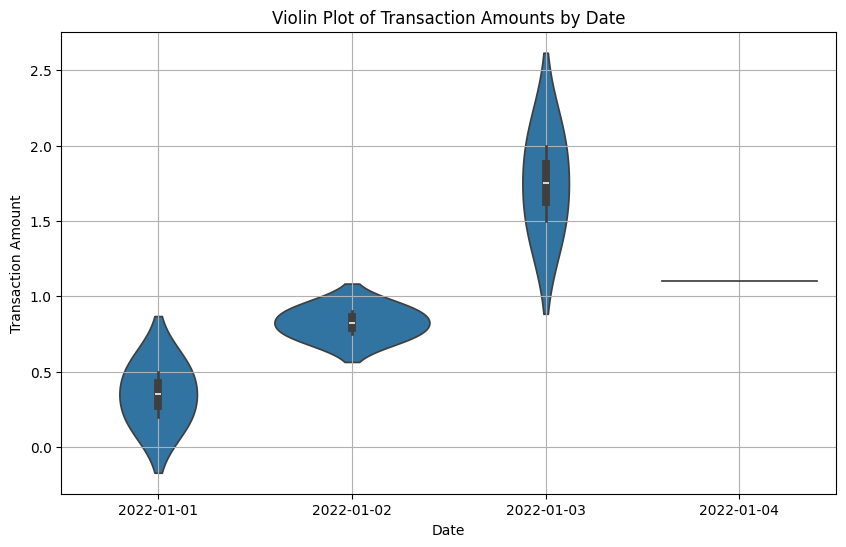

<Figure size 1000x600 with 0 Axes>

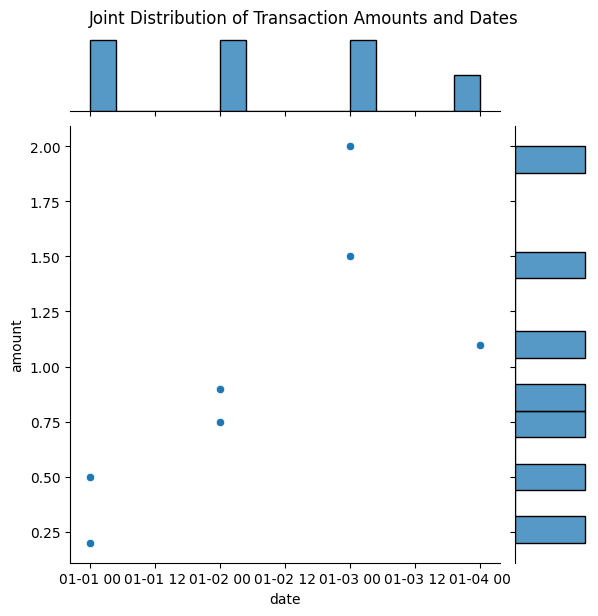

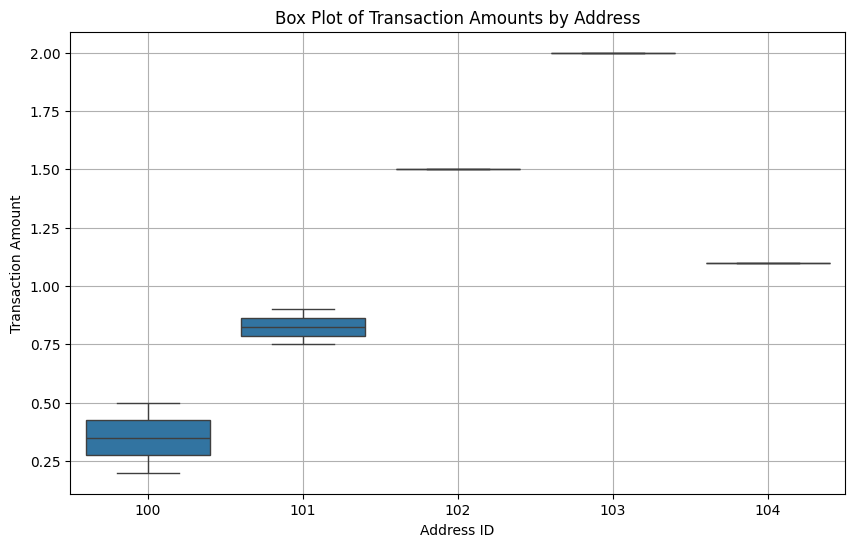

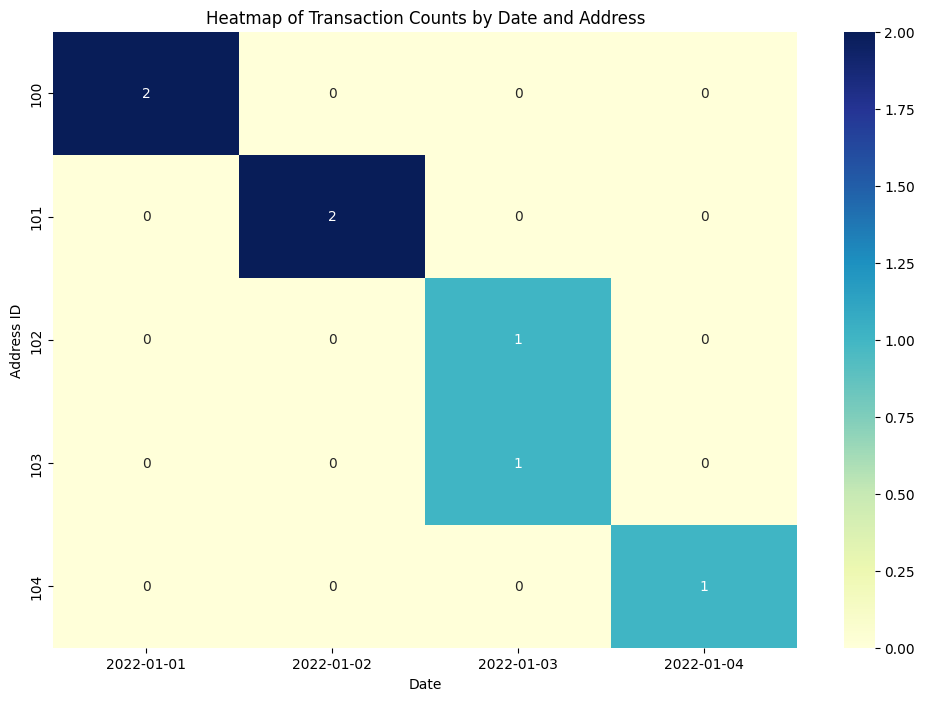

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'amount': [0.5, 0.75, 1.5, 0.2, 0.9, 2.0, 1.1],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# 1. Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='amount', data=df, marker='o')
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 3. Correlation Heatmap
corr_matrix = df[['transaction_id', 'address_id', 'amount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Pairplot of Numerical Features
sns.pairplot(df[['transaction_id', 'address_id', 'amount']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
# 5. Violin Plot of Transaction Amounts by Date
plt.figure(figsize=(10, 6))
sns.violinplot(x='date', y='amount', data=df)
plt.title('Violin Plot of Transaction Amounts by Date')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 6. Joint Distribution Plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='date', y='amount', data=df, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Distribution of Transaction Amounts and Dates', y=1.02)
plt.show()

# 7. Box Plot of Transaction Amounts by Address
plt.figure(figsize=(10, 6))
sns.boxplot(x='address_id', y='amount', data=df)
plt.title('Box Plot of Transaction Amounts by Address')
plt.xlabel('Address ID')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 8. Heatmap of Transaction Counts by Date and Address
# Prepare data for the heatmap
heatmap_data = df.pivot_table(index='address_id', columns=df['date'].dt.date, values='transaction_id', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap of Transaction Counts by Date and Address')
plt.xlabel('Date')
plt.ylabel('Address ID')
plt.show()